# Instructions - Scraping popular songs  
Your product will take a song as an input from the user and will output another song (the recommendation).  
In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on  
the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.  

You have find data on the internet about currently popular songs.  
Billboard maintains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100.  
It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.  

## Lab 1: Scrape Top 100  currently'hot' songs.


In [2]:
# import necessary libraries
from bs4 import BeautifulSoup
import requests
import numpy as np 
import pandas as pd
import time
from random import randint




In [3]:
# create a request object
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
print(response.status_code)

200


In [4]:
# parse request object content with beautiful soup
soup = BeautifulSoup(response.content, "html.parser")


In [5]:
# Search for desired elements using selectors from the URL source information.

# selects the entire span covering the list element for each song in the top 100 list.
song = soup.select("span.chart-element__information")

# selects the span covering only the song information pertaining to the song title.
song_title = soup.select("span.chart-element__information__song.text--truncate.color--primary")

# selects the span covering only the song information pertaining to the artist.
artist = soup.select("span.chart-element__information__artist.text--truncate.color--secondary")

In [6]:
# Create lists to iterate the scraped text data into.
song_titles = []
artist_name = []

# create a for loop to store the text data scraped from each span in the lists defined above
for item in range(len(song)):
    song_titles.append(song_title[item].get_text())
    artist_name.append(artist[item].get_text())

song_titles
#artist_name

['Way 2 Sexy',
 'Girls Want Girls',
 'Fair Trade',
 'Champagne Poetry',
 'Knife Talk',
 'Stay',
 'In The Bible',
 "Papi's Home",
 'TSU',
 'Love All',
 'No Friends In The Industry',
 'N 2 Deep',
 'Bad Habits',
 'Pipe Down',
 'Good 4 U',
 '7am On Bridle Path',
 'Butter',
 'Race My Mind',
 'Kiss Me More',
 'Industry Baby',
 'Fancy Like',
 'IMY2',
 'Levitating',
 "Yebba's Heartbreak",
 'You Only Live Twice',
 'Fountains',
 'Get Along Better',
 'Save Your Tears',
 'Hurricane',
 'Montero (Call Me By Your Name)',
 'Deja Vu',
 'Fucking Fans',
 'Heat Waves',
 'Essence',
 'The Remorse',
 'You Right',
 'Take My Breath',
 'Need To Know',
 "Beggin'",
 'Leave Before You Love Me',
 'Off The Grid',
 'Happier Than Ever',
 "If I Didn't Love You",
 'Family Ties',
 'Pepas',
 'Leave The Door Open',
 'Peaches',
 'Waves',
 'Traitor',
 'Moon',
 'Things A Man Oughta Know',
 'Country Again',
 'Chasing After You',
 'Arcade',
 'Rumors',
 'Cold Beer Calling My Name',
 'Thot Shit',
 'Jail',
 'Late At Night',
 'A-O-

In [7]:
# Create a dataframe of the top 100 songs and their associated artists. 

Top_100 = pd.DataFrame({'Artist Name':artist_name,'Track Title':song_titles})

## Lab 2 (Scrape additional song data from other webpages)

Get the top 100 songs by year for 2000-2016 from playback.fm

In [8]:
# create a loop to enable naps between get requests to respectfully scrape the song data from each page in the list.
def naptime():
    nap = randint(1,8)
    print(f"Resting for {nap} seconds")
    time.sleep(nap)

In [9]:
# Create a loop to generate urls for each page in the desired range of webpages and store them in a list.

webpages = []
years = range(1990, 2017, 1)

for item in years:
    start_at= str(item)
    url = f"https://playback.fm/charts/top-100-songs/{start_at}"
    webpages.append(url)

len(webpages)

27

In [10]:
# test scraping script on 3 random pages.
#y2k = BeautifulSoup(requests.get(webpages[0]).content, 'html.parser')

#artist = list(y2k.select("td:nth-child(2) > a"))
#for a in artist:
#    print(a.get_text())

#song_title = list(y2k.select("td.mobile-hide > a > span.song"))
#for s in song_title:
#   print(s.get_text())

#y2k10 = BeautifulSoup(requests.get(webpages[9]).content, 'html.parser')

#artist2 = list(y2k10.select("td:nth-child(2) > a"))
#for a in artist2:
#    print(a.get_text())

#song_title2 = list(y2k10.select("td.mobile-hide > a > span.song"))
#for s in song_title2:
#    print(s.get_text())

# y2k20 = BeautifulSoup(requests.get(webpages[15]).content, 'html.parser')

# artist3 = list(y2k20.select("td:nth-child(2) > a"))

# for a in artist3:
#     print(a.get_text())

# song_title3 = list(y2k20.select("td.mobile-hide > a > span.song"))
# for s in song_title3:
#      print(s.get_text())


In [11]:
# assemble script to send and store multiple requests using the urls stored in webpages
artists2 = []
songtitles2 = []
for page in webpages:
    # create request object
    request_page = requests.get(page)
    
    # monitor the status code
    print(f"Status code: {request_page.status_code}")

    # create a parsed soup object
    soup = BeautifulSoup(request_page.content, 'html.parser')

    for a in soup.select("td:nth-child(2) > a"):
        artists2.append(a.get_text())

    for s in soup.select("td.mobile-hide > a > span.song"):
        songtitles2.append(s.get_text())

    naptime()




Status code: 200
Resting for 1 seconds
Status code: 200
Resting for 3 seconds
Status code: 200
Resting for 2 seconds
Status code: 200
Resting for 2 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 6 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 2 seconds
Status code: 200
Resting for 6 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 5 seconds
Status code: 200
Resting for 1 seconds
Status code: 200
Resting for 7 seconds
Status code: 200
Resting for 2 seconds
Status code: 200
Resting for 2 seconds
Status code: 200
Resting for 4 seconds
Status code: 200
Resting for 3 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 3 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 2 seconds
Status code: 200
Resting for 4 seconds
Status code: 200
Resting for 8 seconds
Status code: 200
Resting for 1 seconds
Status code: 200
Resting 

In [12]:
# clean up the artist name strings
artists2 = list(map(lambda x: x.replace("\n",""), artists2))

In [13]:
# Create a dataframe of collected songs and artists from 1990-2016
top100_1990_2016 = pd.DataFrame({'Artist Name':artists2,'Track Title':songtitles2})

In [14]:
# Remove duplicates and set the index appropriately.
top100_1990_2016.drop_duplicates(inplace = True, ignore_index= True)
top100_1990_2016

,Artist Name,Track Title
0,Sinead O'Connor,Nothing Compares 2 U
1,Madonna,Vogue
2,Londonbeat,I've Been Thinking About You
3,MC Hammer,U Can't Touch This
4,Vanilla Ice,Ice Ice Baby
...,...,...
2657,J Balvin,Ginza
2658,Hozier,Take Me To Church
2659,Joey Montana,Picky
2660,Yo Gotti,Down In the DM


In [15]:
# add hot songs to a single dataframe
Hot_songs = pd.concat((Top_100, top100_1990_2016), axis = 0).reset_index()
Hot_songs.drop_duplicates(inplace = True)
Hot_songs.drop('index', axis = 1, inplace = True)
Hot_songs


,Artist Name,Track Title
0,Drake Featuring Future & Young Thug,Way 2 Sexy
1,Drake Featuring Lil Baby,Girls Want Girls
2,Drake Featuring Travis Scott,Fair Trade
3,Drake,Champagne Poetry
4,Drake Featuring 21 Savage & Project Pat,Knife Talk
...,...,...
2757,J Balvin,Ginza
2758,Hozier,Take Me To Church
2759,Joey Montana,Picky
2760,Yo Gotti,Down In the DM


In [16]:
import getpass
import json


In [18]:
# access spotify web API
string = open(r"C:\Users\Ish\Documents\Ironhack Bootcamp\Unit 6\Day 3\spotAuth.txt","r").read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]



In [ ]:
# Auth_url = 'https://accounts.spotify.com/api/token'
# auth_response = requests.post(Auth_url,{
#     'grant_type': 'client_credentials',
#     'client_id': secrets_dict['CID'],
#     'client_secret': secrets_dict['CSEC']})

# auth_response_data = auth_response.json()

In [ ]:
# auth_response_data
# access_token = auth_response_data['access_token']

# # now with this we are in more familiar territory

# headers = {'Authorization':f'Bearer {access_token}'}

In [ ]:
# with headers we can now make our requests to the spotify api
# get 
#features_api = 'https://api.spotify.com/v1/audio-features'
#make a get request with requests.
# response = requests.get(features_api+'/2JeEIJFABPGktfB7tgQFX9?si=34bb7016b74a4d3a', headers = headers)



In [ ]:
# response.json()

In [19]:
# create a function to search through a dataframe of songs check that the input is in it, and return a random song. 
def random_song(song_data = Hot_songs):
    # Create an input option to allow a user to input a track title and artist name.
    user_song_input = input('FEED ME A TASTY SONG. ')
    user_artist_input = input('WHO MADE THIS SONG? IT IS VERY NICE. ')
    user_request = {'Track Title':user_song_input, 'Artist Name':user_artist_input}
    Hot = False
    for i in song_data['Track Title']:    
        if user_request['Track Title'].lower() == i.lower():
            random_rec = song_data.iloc[randint(0,(song_data.shape[0]))]
            print(f'You should try this:\n"{random_rec[1]}" by {random_rec[0]}')
            Hot = True
            break
        else:
            Hot = False
            pass
    if Hot:
        pass
    else:
        print(f"Sorry, no results found for: {user_request}.\nAre you sure you spelled it correctly?")

random_song(Hot_songs)


Sorry, no results found for: {'Track Title': 'pressure', 'Artist Name': 'prodigy'}.
Are you sure you spelled it correctly?


In [20]:
# connect to spotify with api wrapper
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['CID'],
                                                           client_secret=secrets_dict['CSEC']))

In [21]:
# create a dict/list of playlists
playlists = {'Ska and Punk':'6icnDAQ82WZ0O1wnfzrQPT','Soca':'23szGFUl7S3nsb88x2JAmz','Reggae':'1YCyYCcmjHIYk0lpkXdxjY','Hype Hip-Hop':'66ixvuO63zUDFznDWMuFjM','Hip-Hop':'397WjBVd3O9pBLofjhZSIh','Blues Rock':'2t7Jjuqw22c4SFrRf8G3hH','Jazz':'37i9dQZF1DXbITWG1ZJKYt','Retrowave':'3ebHKSjHujS4Tyt2KKP97R','Pop Mix':'357k6DHp7aUnDIA1a5kpp7',"80s Pop":'2KvnvJuv2YLHqs2aW5pf1X','Classic Rock':'6TeyryiZ2UEf3CbLXyztFA','Djent and metalcore':'5XXsROCzMVNP00spESFGCu','Prog and Heavy metal':'1LYbGt2UIeI0KhKxH8ehcP'}
# create an empty list to store results
playlist_tracks = []
# define a function to extract the track information for each track in a playlist
def get_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        time.sleep(randint(1,5))
        
    return tracks
#run a loop to extract the tracks from the dict/list of playlists and store the results in a list.
for key in playlists.keys():
    playlist_tracks= playlist_tracks + (get_tracks(playlists[key]))


    


In [22]:
len(playlist_tracks)

8871

In [23]:
#create function to extract track uris from a list of tracks
def track_uris(spotify_tracks):
    uris = [track['track']['uri']for track in spotify_tracks]
    return uris
    
song_uris = track_uris(playlist_tracks)

song_uris[0]

'spotify:track:4uB28m7RAflobYpnLMb6A2'

In [24]:
#create function to extract track names from a list of track names and return the result as a list
def track_titles(spotify_tracks):
    titles = [track['track']['name']for track in spotify_tracks]
    return titles

song_titles = track_titles(playlist_tracks)
len(song_titles)

    

8871

In [25]:
# create a function to extract the song links from each song
def track_links(spotify_tracks):
    links = [track['track']['external_urls'] for track in spotify_tracks]
    return links

song_links = track_links(playlist_tracks)
#song_links = [song_links[x][ list(song_links[x].keys())[0] ] for x in range(len(song_links))]
links = []
for x in song_links:
   links = links + list(x.values())

len(links)

  

8819

In [26]:
# create function to extract contributing artists as lists from each song
def track_artists(spotify_tracks):
    artists = [[track['track']['artists'][x]['name'] for x in range(len(track['track']['artists']))]for track in spotify_tracks]
    return artists

song_artists = track_artists(playlist_tracks)
len(song_artists)

8871

In [27]:
song_data = pd.DataFrame({'song_title':song_titles,'artists':song_artists, 'song_uri':song_uris})
song_data

,song_title,artists,song_uri
0,Linoleum,[NOFX],spotify:track:4uB28m7RAflobYpnLMb6A2
1,Big Bang,[Bad Religion],spotify:track:318CznWjAUDlkYDHP2VYTQ
2,I'm The One,[Descendents],spotify:track:5XXiK8GZjjmCHpBpUEm9z5
3,Straight Edge,[Minor Threat],spotify:track:3Iw6tbCYDYb3libUo3bB5S
4,Bikeage,[Descendents],spotify:track:5EC1LGwsPHVXBcjlf3cHct
...,...,...,...
8866,Chosen,[Adagio],spotify:track:72NIDzRo7FmEZmKbmR6mtq
8867,Fire Forever,[Adagio],spotify:track:0ZFTT5BBsoW0ddt2TBOV0H
8868,We All Die Young,[Eden's Curse],spotify:track:2e7icsMde2NiAzemsqNhZS
8869,Evil & Divine,[Eden's Curse],spotify:track:7uDElGnrYEgMQdSA3tSlhZ


In [28]:
# get the track features for each track from the list of tracks as a list.
def track_features(spotify_tracks):
    uris = track_uris(spotify_tracks)
    track_ids = [uri.split(':')[-1] for uri in uris]
    audio_features = [sp.audio_features(track_ids[x]) for x in range(len(spotify_tracks))]
    audio_features =list(audio_features[x][0] for x in range(len(audio_features)))
    time.sleep(randint(1,3))
    return audio_features

song_features = track_features(playlist_tracks)


In [29]:
song_data['features'] = song_features

In [30]:
print(song_data.shape)
song_data.dropna(inplace =True)
print(song_data.shape)

(8871, 4)
(8819, 4)


In [31]:
# create a list of the remaining song feature dictionaries
feature_list= list(song_data['features'])
print(len(feature_list))

8819


In [32]:
# create function to take in a set of audio features from a track and output the results as a dataframe.
def track_feature_split2(feature_sets):

    danceability = [feature['danceability'] for feature in feature_sets]
    energy = [feature['energy'] for feature in feature_sets]
    key = [feature['key'] for feature in feature_sets]
    loudness = [feature['loudness'] for feature in feature_sets]
    mode = [feature['mode'] for feature in feature_sets]
    speechiness = [feature['speechiness'] for feature in feature_sets]
    acousticness = [feature['acousticness'] for feature in feature_sets]
    instrumentalness = [feature['instrumentalness'] for feature in feature_sets]
    liveness = [feature['liveness'] for feature in feature_sets]
    valence = [feature['valence'] for feature in feature_sets]
    tempo = [feature['tempo'] for feature in feature_sets]
    duration = [feature['duration_ms'] for feature in feature_sets]
    time_signature = [feature['time_signature'] for feature in feature_sets]

    feature_df = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo, 'duration': duration, 'time signature':time_signature})
    return feature_df

In [33]:
track_features = track_feature_split2(feature_list)
len(track_features)

8819

In [34]:
song_features = pd.concat((song_data,track_features), axis = 1)
song_features.drop('features', axis = 1, inplace= True)

In [35]:
song_features.dropna(inplace = True)
song_features.shape

(8767, 16)

In [36]:
song_features.to_csv('song_features.csv')


In [37]:
song_features['time signature'].value_counts()

4.0    8304
3.0     360
5.0      57
1.0      45
0.0       1
Name: time signature, dtype: int64

# Clustering
1. Build the clustering algorithm to cluster the tracks collected above using K-Means Clustering, Agglomerative Clustering, DBSCAN clustering.
2. Evaluate alogrithm performance.
3. Select the best performing clustering model (the lowest inertia score at the end)


In [38]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.lines import Line2D
from sklearn import metrics


In [39]:
# Split data into features and targets
# Time_signature will be dropped from this list of features as it represents categorical information, rather than continuous information.
X_features = song_features[['danceability', 'energy', 'key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration']]
X_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.180,0.934,4.0,-8.699,1.0,0.1150,0.000033,0.000551,0.0702,0.433,197.043,130267.0
1,0.217,0.995,7.0,-3.020,1.0,0.1910,0.001990,0.000000,0.3700,0.442,159.957,102293.0
2,0.391,0.968,0.0,-6.324,1.0,0.0625,0.010200,0.000070,0.4460,0.647,90.481,135133.0
3,0.251,0.958,5.0,-6.383,1.0,0.0685,0.000980,0.004080,0.3130,0.748,189.067,47227.0
4,0.243,0.875,7.0,-8.541,1.0,0.0553,0.001100,0.000000,0.3540,0.739,193.965,134200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8814,0.397,0.929,1.0,-3.870,1.0,0.0617,0.003240,0.000769,0.4830,0.188,175.960,472581.0
8815,0.363,0.981,4.0,-5.435,1.0,0.0949,0.000803,0.007990,0.3590,0.132,170.025,251559.0
8816,0.275,0.769,6.0,-5.312,1.0,0.0425,0.000637,0.057400,0.1180,0.182,187.932,243387.0
8817,0.491,0.966,8.0,-3.787,0.0,0.0523,0.000335,0.000344,0.1610,0.474,121.997,299987.0


In [40]:
# tempo and duration have much larger scales than the other values, so these values should be scaled.
Feature_scaler1 = StandardScaler().fit(X_features)
# scale the data.
X_scaled1 = Feature_scaler1.transform(X_features)
X_scaled1_df= pd.DataFrame(X_scaled1, columns = [X_features.columns])

X_scaled1_df.head()



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-2.050624,0.961979,-0.346208,-0.355794,0.700885,0.206608,-0.694350,-0.331799,-0.798775,-0.471725,2.454669,-1.224292
1,-1.850315,1.249169,0.481350,1.213420,0.700885,1.063249,-0.685391,-0.334557,0.959572,-0.436628,1.186638,-1.560121
2,-0.908322,1.122052,-1.449619,0.300463,0.700885,-0.385151,-0.647805,-0.334206,1.405317,0.362815,-1.188862,-1.165876
3,-1.666247,1.074972,-0.070355,0.284160,0.700885,-0.317521,-0.690015,-0.314132,0.625263,0.756687,2.181957,-2.221189
4,-1.709557,0.684204,0.481350,-0.312135,0.700885,-0.466306,-0.689466,-0.334557,0.865731,0.721589,2.349428,-1.177076


In [41]:
# tempo and duration have much larger scales than the other values, so these values should be scaled.
Feature_scaler2 = StandardScaler().fit(X_features)
# scale the data.
X_scaled2 = Feature_scaler2.transform(X_features)
X_scaled_df2 = pd.DataFrame(X_scaled2, columns = [X_features.columns])
X_scaled_df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,-2.050624,0.961979,-0.346208,-0.355794,0.700885,0.206608,-0.694350,-0.331799,-0.798775,-0.471725,2.454669,-1.224292
1,-1.850315,1.249169,0.481350,1.213420,0.700885,1.063249,-0.685391,-0.334557,0.959572,-0.436628,1.186638,-1.560121
2,-0.908322,1.122052,-1.449619,0.300463,0.700885,-0.385151,-0.647805,-0.334206,1.405317,0.362815,-1.188862,-1.165876
3,-1.666247,1.074972,-0.070355,0.284160,0.700885,-0.317521,-0.690015,-0.314132,0.625263,0.756687,2.181957,-2.221189
4,-1.709557,0.684204,0.481350,-0.312135,0.700885,-0.466306,-0.689466,-0.334557,0.865731,0.721589,2.349428,-1.177076


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

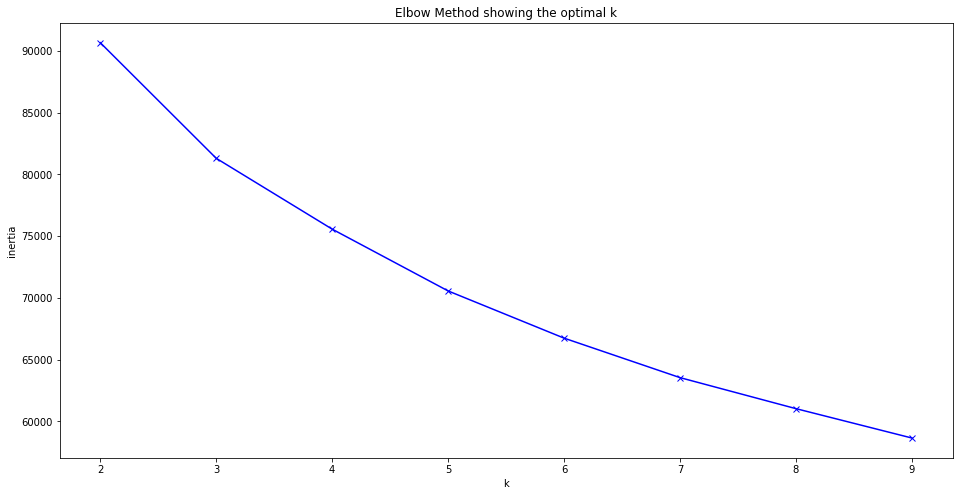

In [42]:
# determine the optimal number of clusters
test_K = range(2, 10)
inertia = []

for k in test_K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled1_df)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(test_K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(test_K), max(test_K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

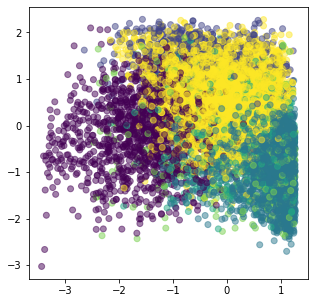

In [84]:
# The optimal number of clusters appears to be 3 but 6 looks more useful, so i will choose 6.   
# Import the k-means clustering algorithm and train it on the datasets. 
kmeans1 = cluster.KMeans(n_clusters=6)
kmeans1.fit(X_scaled1_df)
pred1 = kmeans1.predict(X_scaled1_df)
pred_1 = pd.DataFrame(pred1)

plt.figure(figsize=(5, 5))
plt.scatter(X_scaled1_df['energy'], X_scaled1_df['danceability'], c=pred1,alpha=0.5)
plt.show()

5    2717
1    2304
2    1424
0    1027
3     805
4     490
dtype: int64


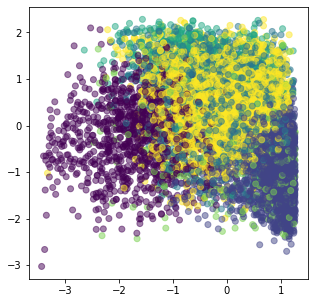

In [73]:
# Import the k-means clustering algorithm and train it on the dataset. 
kmeans2 = cluster.KMeans(n_clusters=6)
kmeans2.fit(X_scaled_df2)
pred2 = kmeans2.predict(X_scaled_df2)
print(pd.DataFrame(pred2).value_counts())

plt.figure(figsize=(5, 5))
plt.scatter(X_scaled_df2['energy'], X_scaled_df2['danceability'], c=pred2,alpha=0.5)
plt.show()



In [64]:
# instantiate and train another model for comparison
from sklearn.cluster import AgglomerativeClustering, Birch

# determine the best linkage algorithm to use for  agglomerative clustering.

for link in ['average','complete','single','ward']:
    aggcluster = AgglomerativeClustering(n_clusters=6, linkage = link)
    predagg = aggcluster.fit_predict(X_scaled1_df)
    p = pd.DataFrame(predagg)
    print(f'Linkage = {link}\n',p.value_counts())


Linkage = average
 0    8727
1      30
2       7
3       1
4       1
5       1
dtype: int64
Linkage = complete
 0    7567
1     986
2     125
4      79
5       8
3       2
dtype: int64
Linkage = single
 0    8761
2       2
1       1
3       1
4       1
5       1
dtype: int64
Linkage = ward
 0    3126
2    1942
4    1752
5    1022
3     513
1     412
dtype: int64


In [80]:
# using the same k value we will generate 6 clusters using the 'ward' linking algorithm
# the 'single', 'complete', and 'average' linking algorithms produced more unbalanced distributions in clusters.
 
aggcluster = AgglomerativeClustering(n_clusters=6, linkage = 'ward')
predagg = aggcluster.fit_predict(X_scaled1_df)
pred_agg =pd.DataFrame(predagg)
pred_agg.value_counts()


0    3126
2    1942
4    1752
5    1022
3     513
1     412
dtype: int64

In [81]:
birchcluster = Birch(n_clusters = 6).fit(X_scaled1_df)
predbrch = birchcluster.predict(X_scaled1_df) 
pred_brch = pd.DataFrame(predbrch)

In [90]:
kmeans = pred_1.value_counts()
aggclustering = pred_agg.value_counts()
birchclustering = pred_brch.value_counts()
clustering = pd.DataFrame([kmeans,aggclustering,birchclustering]).T
clustering.columns = ['Kmeans','Agglomerative Clustering','BIRCH Clustering']
clustering


,Kmeans,Agglomerative Clustering,BIRCH Clustering
0,,,
0,1200,3126,2706
1,942,412,2940
2,2460,1942,819
3,546,513,501
4,489,1752,867
5,3130,1022,934


In [ ]:
# Add clusters to the song features dataframe
song_features['clusters'] = pred1
song_features['clusters'].value_counts()


0    2701
2    2323
1    1431
5    1018
3     804
4     490
Name: clusters, dtype: int64

In [ ]:
# pickle models and scalers 
import pickle

pickle.dump(Feature_scaler1, open('minmaxscaler.pkl', 'wb'))
pickle.dump(kmeans1, open('kmeanscluster.pkl', 'wb'))
song_features.to_pickle('./spotify_song_data.pkl')
Hot_songs.to_pickle('./hot_songs_data.pkl')


# Start writing the recommender
Create a function to take in user input and check if it is in Hot_songs.  
If it is a hot song, output a random recommendation from the list of Hot_songs.

Otherwise, use the input details to:  
1. create a spotify api call  
2. find the song features  
3. apply Feature_scaler1  
4. generate a cluster location for the track  
5.  return a random track from the same cluster. 

In [ ]:
# create a function to take in a user request and search for song features based on the request.
def song_seeker(request):
    search = sp.search(q = request['Track Title'], type = 'track' )
    for track in search['tracks']['items']:
        if request['Track Title'].lower()in [track['name'].lower() for track in search['tracks']['items']] and request['Artist Name'].lower() in [track['artists'][x]['name'].lower() for x in range(len(track['artists']))]:
           features = sp.audio_features(track['id'])
           feature_frame = pd.DataFrame(features)
           feature_frame = feature_frame._get_numeric_data()
           feature_frame.drop('time_signature', axis = 1, inplace = True)
           return feature_frame
        elif request['Track Title'].lower() in [track['name'].lower() for track in search['tracks']['items']] :
           features = sp.audio_features(track['id'])
           feature_frame = pd.DataFrame(features)
           feature_frame = feature_frame._get_numeric_data()
           feature_frame.drop('time_signature', axis = 1, inplace = True)
           return feature_frame
        else:
           try_again = f"Sorry, no results found for: {request}.Are you sure you spelled it correctly?"
           return try_again


In [ ]:
# create a function to take in a cluster and return a random other song with the same cluster number.

def song_retriever(cluster, song_list = song_features):
    cluster_list = song_list[song_list['clusters'] == cluster]
    random_recommendation = cluster_list.iloc[randint(0,len(cluster_list))]
    random_recommendation = random_recommendation[['song_title', 'artists']]
    return random_recommendation.to_dict()


In [ ]:
recommendation = song_retriever(4)

recommendation['song_title']

'Enjoy the Silence - Single Mix'

In [ ]:
# create a function to search through a dataframe of songs check that the input is in it, and return a random song. 
def random_song(song_data = Hot_songs):
    # Create an input option to allow a user to input a track title and artist name.
    Hot = False
    while not Hot:
        user_song_input = input('Song:')
        user_artist_input = input('Artist: ')
        user_request = {'Track Title':user_song_input, 'Artist Name':user_artist_input}

        for i in song_data['Track Title']:    
            if user_request['Track Title'].lower() == i.lower():
                random_rec = song_data.iloc[randint(0,(song_data.shape[0]))]
                print(f'If you like {user_request} you might like:\n"{random_rec[1]}" by {random_rec[0]}')
                Hot = True
                break
            else:
                pass
        if Hot:
            pass
        else:
            results = song_seeker(user_request)
            song_title = user_request['Track Title']
            artist = user_request['Artist Name']
            if type(results) != str and type(results) != None:
                scaled_results = pd.DataFrame(Feature_scaler1.transform(results))
                cluster = kmeans1.predict(scaled_results)[0]
                recommendation = song_retriever(cluster,song_features)
                recommendation_title = recommendation['song_title']
                recommendation_artist = recommendation['artists']
                print(f'If you like "{song_title}" then you might like:\n "{recommendation_title}" by {recommendation_artist}')
                Hot = True
                break
            else:
                print(results)
        

In [ ]:
query = song_request()
results = song_seeker(query)
results


NameError: name 'song_request' is not defined

In [ ]:
random_song()

If you like "flex" then you might like:
 "Old Skool" by ['Local Resident Failure']
